In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [4]:
data=pd.read_csv('CarPrice_Assignment.csv')
print(data.head())
print(data.info())

   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \

In [8]:
data=data.drop(['CarName','car_ID'],axis=1)
data=pd.get_dummies(data,drop_first=True)

In [9]:
X=data.drop('price',axis=1)
y=data['price']

In [15]:
scaler = StandardScaler()
X=scaler.fit_transform(X)
y=scaler.fit_transform(np.array(y).reshape(-1,1))
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
sgd_model=SGDRegressor(max_iter=1000,tol=1e-3)
sgd_model.fit(X_train,y_train)
y_pred=sgd_model.predict(X_test)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [16]:
print('Name: Popuri Sahithya')
print('Reg No:212225240106')
print(f"{'MSE':}:{mean_squared_error(y_test,y_pred):}")
print(f"{'MAE':}:{mean_absolute_error(y_test,y_pred):}")
print(f"{'R-squared':}:{r2_score(y_test,y_pred):}")
print("\nModel Coefficients:")
print("Coefficients:",sgd_model.coef_)
print("Intercept:",sgd_model.intercept_)

Name: Popuri Sahithya
Reg No:212225240106
MSE:0.21363257179334838
MAE:0.3196656297697753
R-squared:0.8281326741601536

Model Coefficients:
Coefficients: [ 0.03447573  0.10913138  0.01466634  0.17277021  0.01779645  0.17537939
  0.2915245  -0.01888738 -0.08415109  0.00131696  0.10294897  0.03788472
 -0.03769434 -0.04845215 -0.02003133  0.02178287  0.01847802 -0.02151842
 -0.0891493  -0.0136748  -0.09589848 -0.03360872  0.06121425  0.21403994
  0.01459204 -0.10173392  0.07388037 -0.01735078  0.00319292  0.0094459
 -0.03284719 -0.14482974 -0.07248955  0.00080448 -0.02797228  0.0094459
 -0.003997   -0.01475771  0.02003133 -0.01850596 -0.03202259 -0.04151243
 -0.01725168]
Intercept: [-0.01149381]


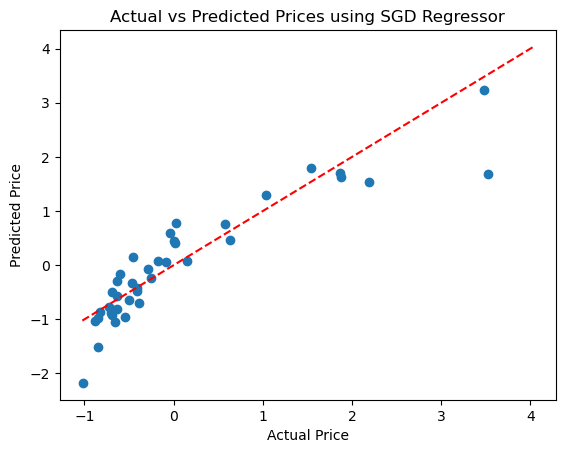

In [17]:
plt.scatter(y_test,y_pred)
plt.plot([y.min(),y.max()],[y.min(),y.max()],'r--')
plt.title("Actual vs Predicted Prices using SGD Regressor")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()